### Importacion de librerias

In [65]:
import comtradeapicall
import requests
import pandas as pd

### 3.3 Verificacion de instalacion

In [66]:
print(requests.__version__)
print(pd.__version__)


2.32.3
2.2.3


## 4. Fase 2: Definición de Datos para la Consulta
### 4.1 ¿Qué se va a consultar?
- Producto: Café (HS 0901)
- Reportero: Colombia (170)
- Socio: EE.UU. (842)
- Años: 2021 y 2022
- Frecuencia: Anual
- Tipo de flujo: Exportaciones (X)


## 5. Consulta a la API de Comtrade
### 5.2 Código para consulta

In [67]:
subscription_key = '180479c8b41f4304beca6c0ed83c8d89'


mydf = comtradeapicall._getFinalData(
    subscription_key,
    typeCode='C', freqCode='A', clCode='HS', period='2021,2022',
    reporterCode='170', partnerCode='842', cmdCode='0901', flowCode='X',
    partner2Code=None, customsCode=None, motCode=None,
    maxRecords=2500,
    format_output='JSON', aggregateBy=None,
    breakdownMode='classic', countOnly=None,
    includeDesc=True
)

mydf.head()

d:\Todo\Documentos\Santiago\3_Trabajo Profesional\Full-Stack-Projects\comtrade-api-testing\.venv\Lib\site-packages\comtradeapicall\PreviewGet.py:166: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  main_df = pandas.concat([main_df, staging_df])


,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,C,A,20210101,2021,52,2021,170,COL,Colombia,X,...,2.932763e+08,False,0.0,False,0.0,1.334163e+09,1.334163e+09,0,False,True
0,C,A,20220101,2022,52,2022,170,COL,Colombia,X,...,2.817243e+08,False,0.0,False,NaN,1.780554e+09,1.780554e+09,0,False,True


## 6. Fase 4: Procesamiento de Datos
### 6.1 Exploración del DataFrame


In [68]:
print(mydf.columns)
print(mydf.describe())


Index(['typeCode', 'freqCode', 'refPeriodId', 'refYear', 'refMonth', 'period',
       'reporterCode', 'reporterISO', 'reporterDesc', 'flowCode', 'flowDesc',
       'partnerCode', 'partnerISO', 'partnerDesc', 'partner2Code',
       'partner2ISO', 'partner2Desc', 'classificationCode',
       'classificationSearchCode', 'isOriginalClassification', 'cmdCode',
       'cmdDesc', 'aggrLevel', 'isLeaf', 'customsCode', 'customsDesc',
       'mosCode', 'motCode', 'motDesc', 'qtyUnitCode', 'qtyUnitAbbr', 'qty',
       'isQtyEstimated', 'altQtyUnitCode', 'altQtyUnitAbbr', 'altQty',
       'isAltQtyEstimated', 'netWgt', 'isNetWgtEstimated', 'grossWgt',
       'isGrossWgtEstimated', 'cifvalue', 'fobvalue', 'primaryValue',
       'legacyEstimationFlag', 'isReported', 'isAggregate'],
      dtype='object')
        refPeriodId      refYear  refMonth  reporterCode  partnerCode  \
count  2.000000e+00     2.000000       2.0           2.0          2.0   
mean   2.021510e+07  2021.500000      52.0         17

## 7. Fase 5: Exportación de Datos
### 7.1 Guardar en Excel


In [69]:
mydf.to_excel('exportaciones_cafe_col_usa.xlsx', index=False)

### 7.2 Verificar creación

In [70]:
import os
print(os.path.exists('exportaciones_cafe_col_usa.xlsx'))


True


## 8. Fase 6: Visualización Gráfica
### 8.1 Gráfico de exportaciones


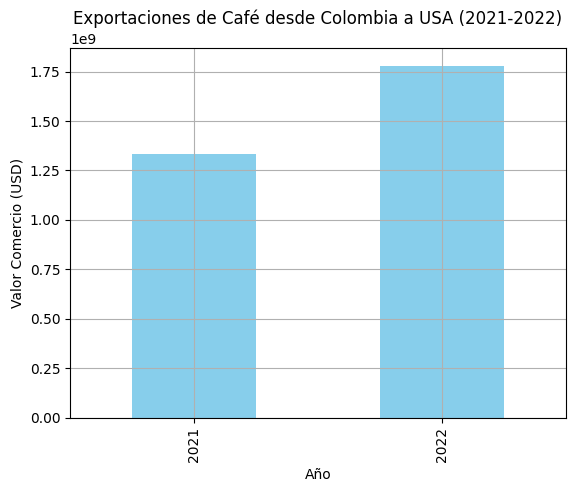

In [71]:
import matplotlib.pyplot as plt

df_plot = mydf.groupby('period')['primaryValue'].sum()
df_plot.plot(kind='bar', color='skyblue')
plt.title('Exportaciones de Café desde Colombia a USA (2021-2022)')
plt.xlabel('Año')
plt.ylabel('Valor Comercio (USD)')
plt.grid(True)
plt.show()


## 9. Fase 7: Almacenamiento en SQLite
### 9.1 Crear base de datos


In [72]:
import sqlite3
conn = sqlite3.connect('comtrade.db')


### 9.2 Insertar tabla

In [73]:
mydf.to_sql('exportaciones_cafe_col_usa', conn, if_exists='replace', index=False)

2

### 9.3 Consultar base

In [74]:
import pandas as pd
consulta = pd.read_sql_query("SELECT * FROM exportaciones_cafe_col_usa", conn)
print(consulta.head())


  typeCode freqCode  refPeriodId  refYear  refMonth period  reporterCode  \
0        C        A     20210101     2021        52   2021           170   
1        C        A     20220101     2022        52   2022           170   

  reporterISO reporterDesc flowCode  ...        netWgt  isNetWgtEstimated  \
0         COL     Colombia        X  ...  2.932763e+08                  0   
1         COL     Colombia        X  ...  2.817243e+08                  0   

  grossWgt isGrossWgtEstimated  cifvalue      fobvalue  primaryValue  \
0      0.0                   0       0.0  1.334163e+09  1.334163e+09   
1      0.0                   0       NaN  1.780554e+09  1.780554e+09   

  legacyEstimationFlag isReported  isAggregate  
0                    0          0            1  
1                    0          0            1  

[2 rows x 47 columns]


### 9.4 Cerrar conexión

In [75]:
conn.close()

## 10. Taller de Ejercicios Guiados
#### Ejercicio 1: Comparar productos
- Productos: Banano (HS 0803) y Azúcar (HS 1701).
- País: Colombia > USA.
- Año: 2022.
- Exportar resultados a Excel.
- Graficar comparación de valores.
- Guardar en SQLite.


#### Comparar productos

In [76]:
banano_df = comtradeapicall._getFinalData(
    subscription_key,
    typeCode='C', freqCode='A', clCode='HS', period='2022',
    reporterCode='170', partnerCode='842', cmdCode='0803', flowCode='X',
    partner2Code=None, customsCode=None, motCode=None,
    maxRecords=2500,
    format_output='JSON', aggregateBy=None,
    breakdownMode='classic', countOnly=None,
    includeDesc=True
)

azucar_df = comtradeapicall._getFinalData(
    subscription_key,
    typeCode='C', freqCode='A', clCode='HS', period='2022',
    reporterCode='170', partnerCode='842', cmdCode='1701', flowCode='X',
    partner2Code=None, customsCode=None, motCode=None,
    maxRecords=2500,
    format_output='JSON', aggregateBy=None,
    breakdownMode='classic', countOnly=None,
    includeDesc=True
)

banano_df['Producto'] = 'Banano'
azucar_df['Producto'] = 'Azúcar'

combined_df = pd.concat([banano_df, azucar_df], ignore_index=True)

combined_df = combined_df[['period', 'Producto', 'primaryValue']]

combined_df.head()

,period,Producto,primaryValue
0,2022,Banano,2.185613e+08
1,2022,Azúcar,9.760218e+07


#### Exportar resultados a Excel.

In [77]:
combined_df.to_excel('exportaciones_banano_azucar_2022.xlsx', index=False)
print("Datos exportados a 'exportaciones_banano_azucar_2022.xlsx'")


Datos exportados a 'exportaciones_banano_azucar_2022.xlsx'


#### Graficar comparación de valores.

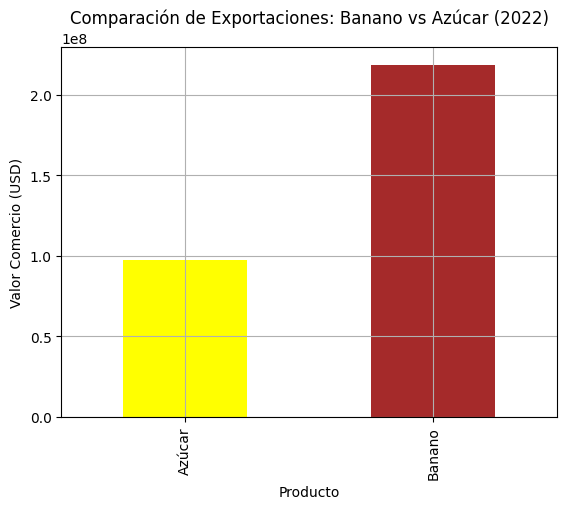

In [78]:
df_plot = combined_df.groupby('Producto')['primaryValue'].sum()
df_plot.plot(kind='bar', color=['yellow', 'brown'])
plt.title('Comparación de Exportaciones: Banano vs Azúcar (2022)')
plt.xlabel('Producto')
plt.ylabel('Valor Comercio (USD)')
plt.grid(True)
plt.show()

#### Guardar en SQLite.

In [79]:
conn = sqlite3.connect('comtrade.db')
combined_df.to_sql('exportaciones_banano_azucar', conn, if_exists='replace', index=False)
print("Datos guardados en la base de datos SQLite 'comtrade.db'")
conn.close()

Datos guardados en la base de datos SQLite 'comtrade.db'


## Ejercicio 2: Analizar importaciones
- Producto: Derivados del petróleo (HS 27).
- Origen: EE.UU. > Colombia.
- Año: 2022.
- Analizar valor total y peso neto (si está disponible).
- Graficar evolución.
- Almacenar en base de datos.


#### Analizar valor total y peso neto 

In [80]:
petroleo_df = comtradeapicall._getFinalData(
    subscription_key,
    typeCode='C', freqCode='A', clCode='HS', period='2022',
    reporterCode='170', partnerCode='842', cmdCode='27', flowCode='M',
    partner2Code=None, customsCode=None, motCode=None,
    maxRecords=2500,
    format_output='JSON', aggregateBy=None,
    breakdownMode='classic', countOnly=None,
    includeDesc=True
)

# Filtrar columnas relevantes
petroleo_df = petroleo_df[['period', 'primaryValue', 'netWgt']]

# Calcular el valor total y el peso neto
valor_total = petroleo_df['primaryValue'].sum()
peso_total = petroleo_df['netWgt'].sum()

print(f"Valor total de importaciones: ${valor_total:,.2f} USD")
print(f"Peso total de importaciones: {peso_total:,.2f} kg")

Valor total de importaciones: $5,849,160,385.50 USD
Peso total de importaciones: 0.00 kg


#### Graficar evolución

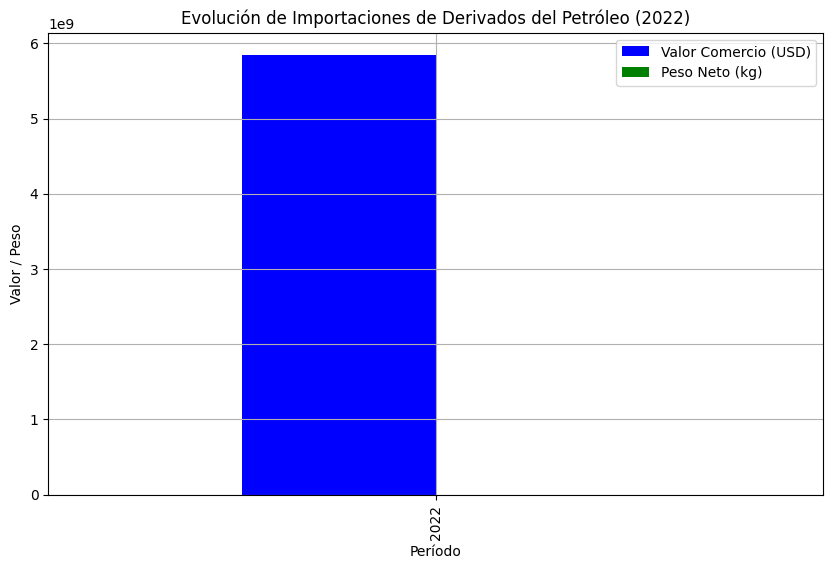

In [81]:
df_plot = petroleo_df.groupby('period').sum()
df_plot[['primaryValue', 'netWgt']].plot(kind='bar', figsize=(10, 6), color=['blue', 'green'])
plt.title('Evolución de Importaciones de Derivados del Petróleo (2022)')
plt.xlabel('Período')
plt.ylabel('Valor / Peso')
plt.legend(['Valor Comercio (USD)', 'Peso Neto (kg)'])
plt.grid(True)
plt.show()



#### Almacenar en base de datos

In [82]:
conn = sqlite3.connect('comtrade.db')
petroleo_df.to_sql('importaciones_petroleo', conn, if_exists='replace', index=False)
print("Datos guardados en la base de datos SQLite 'comtrade.db'")
conn.close()

Datos guardados en la base de datos SQLite 'comtrade.db'
